## Sonar Waves (Mine or Rock)

Sonar technology can be used to detect and classify underwater objects such as rocks and mines. The process typically involves emitting sound waves and analyzing the returning echoes to determine the characteristics of the objects in the water. This information can then be used to identify and locate rocks and mines.

There are different types of sonar systems that can be used for this purpose, including active sonar, which emits a sound signal and listens for the return, and passive sonar, which listens for the sound emitted by a target.

![Medical](http://www.marine-electronics.co.uk/images/seaecho/sea%20ice.jpg)

In order to classify objects as rocks or mines, the sonar data is usually processed and analyzed using algorithms, such as machine learning algorithms, that can identify specific features of the objects based on the characteristics of the echoes.

It's important to note that sonar detection is not 100% accurate and can be affected by environmental conditions such as water temperature, salinity, and sound absorption.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Collection and Data Processing

Data processing, on the other hand, is the process of converting raw data into a format that can be analyzed and understood. This may involve cleaning and organizing the data, transforming it into a specific format, and running statistical or machine learning algorithms on it to extract insights and information.

Data collection and data processing are closely related, as the quality and accuracy of the processed data depend on the methods and instruments used for data collection.

In the context of sonar data, data collection would involve the use of sonar equipment to collect data on underwater objects, while data processing would involve cleaning and analyzing the collected data to identify and classify objects as rocks or mines.

Data Processing steps can be divided into several stages:

- Data cleaning: to remove or correct errors and inconsistencies in the data.
- Data integration: combine data from multiple sources.
- Data transformation: convert the data into a format that can be analyzed.
- Data reduction: Reduce the data set to a smaller set of relevant data.
- Data mining: Extracting information and knowledge from the data using statistical, machine learning or other techniques.
- Data visualization: Visualize the results of the analysis in order to make it more understandable.

After the data is processed, it can be used for a variety of purposes such as making predictions, identifying patterns, and detecting anomalies.

In [2]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('Dataset/sonar data.csv', header=None)

In [4]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
# number of rows and columns
sonar_data.shape

(208, 61)

In [6]:
sonar_data.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

The data, also known as the feature set or input, represents the observations or measurements that are used as input to a machine learning model. This can include information such as the sonar readings, collected by sonar equipment, that are used to detect and classify underwater objects.

The labels, also known as the target or output, represent the desired outcome or result of the machine learning model. In the context of sonar data, the labels might represent whether an object is a rock or a mine.

Separating the data and labels allows the machine learning model to be trained on the data and then tested on unseen data, using the labels as a way to evaluate the model's performance.

It's important to note that the data and labels must be separated before the training process, and the same separation should be done for any new data that the model will be tested on. This is to ensure that the model is not being trained on the same data it will be tested on, which would lead to overfitting and a poor generalization of the model.

In [3]:
# separating data and Labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

## Data Splitting 

After separating the data and labels, it is common practice to further divide the data into two sets: a training set and a test set.

The training set is used to train the machine learning model and consists of a portion of the data and its corresponding labels. The model learns to make predictions based on the relationships and patterns in the training data.

The test set, on the other hand, is used to evaluate the performance of the trained model. It consists of a different portion of the data and its corresponding labels that the model has not seen during the training process. This set is used to assess the model's ability to generalize and make accurate predictions on unseen data.

Data splitting is an important step in the machine learning process because it ensures that the model is being evaluated on data it has not seen before, which gives a better understanding of the model's real-world performance.

The common practice is to split the data into a 70-80% training set and a 20-30% test set, but the ratio of the split can vary based on the size of the dataset and the specific application.



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

## Modeling and Classification Analysis

Comparing the performance of different classification algorithms is an important step in the machine learning process. This allows you to evaluate the accuracy and performance of different models and select the best one for your specific problem and dataset.

There are many classification algorithms available in machine learning, including:

- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machine (SVM)
- Naive Bayes
- k-Nearest Neighbors (k-NN)
- Neural Networks
- Gradient Boosting

Each algorithm has its own strengths and weaknesses, and the best algorithm for a particular problem will depend on the specific characteristics of the dataset and the problem itself.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [19]:
classifiers = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier(), KNeighborsClassifier()]
classifier_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'MLP', 'KNN']
training_accuracies = []
testing_accuracies = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    training_accuracies.append(clf.score(X_train, y_train))
    testing_accuracies.append(clf.score(X_test, y_test))
    y_pred_train = clf.predict(X_train)
    training_data_accuracy = accuracy_score(y_pred_train, y_train) 
    print(f'Trainig Accuracy With {clf} is : {training_data_accuracy}')
    y_pred_test = clf.predict(X_test)
    testing_data_accuracy = accuracy_score(y_pred_test, y_test) 
    print(f'Trainig Accuracy With {clf} is : {testing_data_accuracy}')
    print('--------------------------------------------------------------------------')

Trainig Accuracy With LogisticRegression() is : 0.8342245989304813
Trainig Accuracy With LogisticRegression() is : 0.7619047619047619
--------------------------------------------------------------------------
Trainig Accuracy With SVC() is : 0.8823529411764706
Trainig Accuracy With SVC() is : 0.8095238095238095
--------------------------------------------------------------------------
Trainig Accuracy With DecisionTreeClassifier() is : 1.0
Trainig Accuracy With DecisionTreeClassifier() is : 0.8095238095238095
--------------------------------------------------------------------------
Trainig Accuracy With RandomForestClassifier() is : 1.0
Trainig Accuracy With RandomForestClassifier() is : 0.7619047619047619
--------------------------------------------------------------------------
Trainig Accuracy With MLPClassifier() is : 0.8716577540106952
Trainig Accuracy With MLPClassifier() is : 0.7619047619047619
--------------------------------------------------------------------------
Trainig A

C:\Users\Almasria computer\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Almasria computer\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Almasria computer\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions

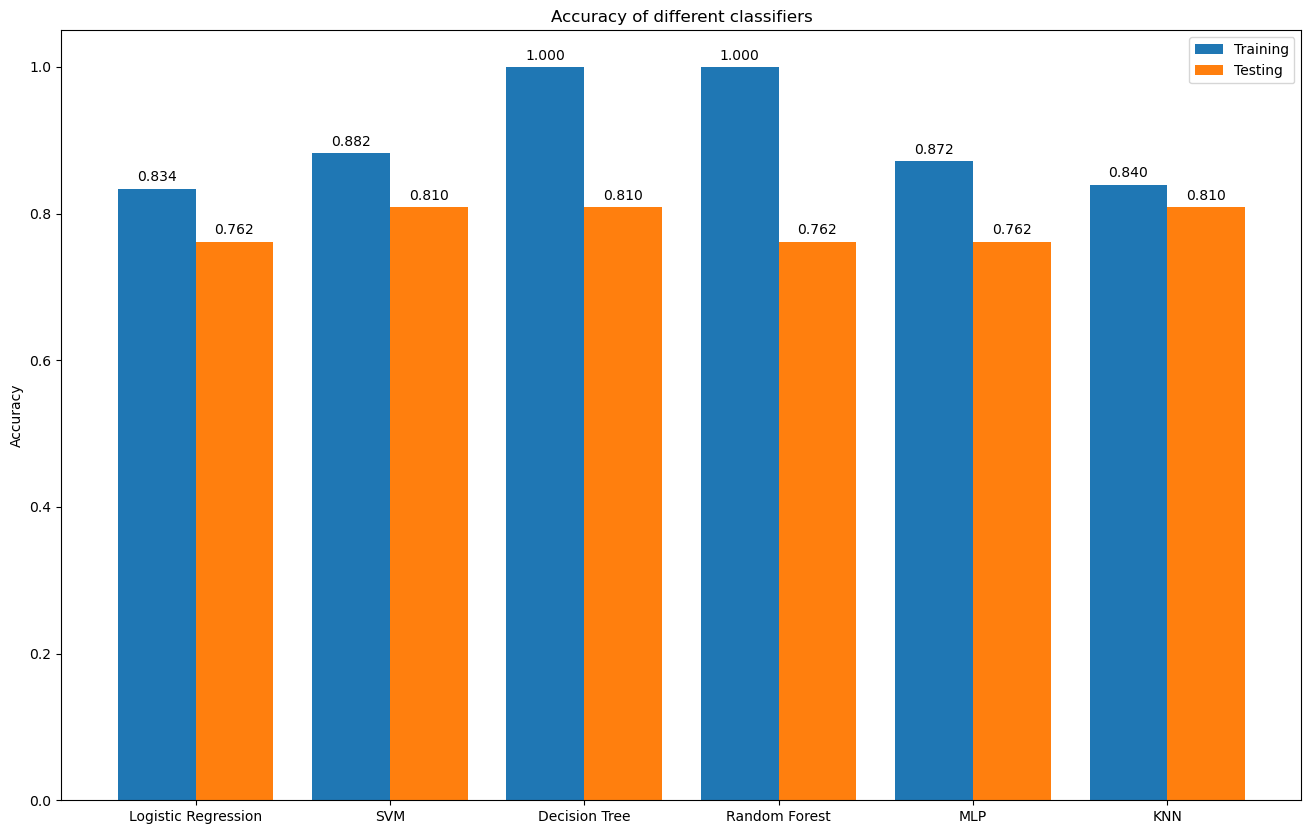

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16,10))
x = np.arange(len(classifier_names))

rects1 = ax.bar(x - 0.2, training_accuracies, 0.4, label='Training')
rects2 = ax.bar(x + 0.2, testing_accuracies, 0.4, label='Testing')

# add labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of different classifiers')
ax.set_xticks(x)
ax.set_xticklabels(classifier_names)
ax.legend()

# function to label the bars with their values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [25]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
training_data_accuracy = accuracy_score(y_pred_train, y_train) 
print(f'Trainig Accuracy With {clf} is : {training_data_accuracy}')
y_pred_test = clf.predict(X_test)
testing_data_accuracy = accuracy_score(y_pred_test, y_test) 
print(f'Trainig Accuracy With {clf} is : {testing_data_accuracy}')


Trainig Accuracy With SVC() is : 0.8823529411764706
Trainig Accuracy With SVC() is : 0.8095238095238095


## Ensemble Learning 

Ensemble learning is a machine learning technique where multiple models are combined to improve the overall performance of the system. The idea behind ensemble learning is that by combining the predictions of multiple models, the final predictions will be more accurate and robust than those of any individual model.

There are several ensemble learning techniques, including:

- Bagging: This technique involves training multiple models independently on different subsets of the data and then averaging or voting on the predictions of each model.

- Boosting: This technique involves training multiple models sequentially, where each model is trained to correct the errors of the previous model.

- Stacking: This technique involves training multiple models independently and then using the predictions of each model as input to a final model, called a meta-model, which makes the final predictions.

- Random Forest: An ensemble of decision tree and is a type of bagging method, where each tree is trained on a random subset of the data.

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1)
bag_clf = BaggingClassifier(svc, n_estimators=50, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

y_pred_train = bag_clf.predict(X_train)
training_data_accuracy = accuracy_score(y_pred_train, y_train) 
print(f'Trainig Accuracy With {clf} is : {training_data_accuracy}')
y_pred_test = bag_clf.predict(X_test)
testing_data_accuracy = accuracy_score(y_pred_test, y_test) 
print(f'Trainig Accuracy With {clf} is : {testing_data_accuracy}')


Trainig Accuracy With SVC() is : 0.8609625668449198
Trainig Accuracy With SVC() is : 0.7619047619047619


In [27]:
from sklearn.ensemble import VotingClassifier

svc = SVC(probability=True)
lr = LogisticRegression()
dt = DecisionTreeClassifier()

ensemble = VotingClassifier(estimators=[('svc', svc), ('lr', lr), ('dt', dt)], voting='soft')
ensemble.fit(X_train, y_train)

y_pred_train = ensemble.predict(X_train)
training_data_accuracy = accuracy_score(y_pred_train, y_train) 
print(f'Trainig Accuracy With {clf} is : {training_data_accuracy}')
y_pred_test = ensemble.predict(X_test)
testing_data_accuracy = accuracy_score(y_pred_test, y_test) 
print(f'Trainig Accuracy With {clf} is : {testing_data_accuracy}')

Trainig Accuracy With SVC() is : 0.983957219251337
Trainig Accuracy With SVC() is : 0.7619047619047619


## Making a Predictive System



In [29]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


['M']
The object is a mine
